In [11]:
import airfoil_simulator
import tensorflow as tf
import numpy as np
import lstm_model
import time
from skopt import gp_minimize
import visualize as viz

In [2]:
def obj_airfoil_lift_drag(x):
    x = np.array(x)
    obj_value = -1*airfoil_simulator.objective(x.reshape(-1))/100
    return obj_value

In [3]:
# imp.reload(lstm_model) # remove this when it's ready
best_model_2d='rnn-cell-2d-1498485717'
steps= 20
dim = 2
x_0 = np.array([-0.1,-0.1]).reshape(-1,2)

In [4]:
print("Starting at %s and optimize for %d steps" % (x_0, steps) )

sess, model_params = lstm_model.load_trained_model(best_model_2d)
start_time = time.time()
sample_x, sample_y = lstm_model.generate_sample_sequence(sess, model_params, x_0, steps = steps, \
    obj_func=lambda x: np.array(obj_airfoil_lift_drag(x)).reshape(1,-1) \
)

sample_y = np.array(sample_y).flatten()
min_y_idx = np.argmin(sample_y)

print("Min -L/D found %f at %s" % (sample_y[min_y_idx], sample_x[min_y_idx].flatten()) )
print("Took %f mins" % (( time.time() - start_time ) / 60.0) )

Starting at [[-0.1 -0.1]] and optimize for 20 steps
./trained_models/rnn-cell-2d-1498485717
Load rnn-cell-2d-1498485717 model
+---------------------+-----------------------------------------------+
| Parameter           | Value                                         |
+---------------------+-----------------------------------------------+
| dim                 | 2                                             |
| epochs              | 600                                           |
| forget_bias         | 5.0                                           |
| gp_length           | 0.4714045207910317                            |
| learning_rate_final | 0.0001                                        |
| learning_rate_init  | 0.005                                         |
| loss_function       | MIN                                           |
| model_path          | ./trained_models/rnn-cell-2d-1498485717/model |
| n_bumps             | 6                                             |
| n_hidden

In [8]:
x_random = []
y_random = []
for i in range(steps):
    print(i)
    x_random += [np.random.uniform(low=-1.0, high=1.0, size=2)]
    y = obj_airfoil_lift_drag(x_random[-1])
    y_random += [y]
print(y_random)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
[0.017736369910282955, -0.027554535017221583, -0.380876346082436, -0.02759415833973866, -0.9758985200845666, -0.9471898197242843, 0.01, -0.058635996771589996, -0.8832665330661322, 0.01, -0.10515613652868555, 0.01, 0.01, 0.01, -0.23478977741137677, 0.01, -0.1534015345268542, -0.5747474747474748, -0.7939879759519038, 0.01]


In [9]:
res = gp_minimize(obj_airfoil_lift_drag, dimensions=[(-1.0,1.0)]*2, n_calls=20, n_random_starts=10) 

In [10]:
print(res.func_vals)

[-0.12748103 -0.6124359  -0.06629221  0.01       -0.34625343  0.01
  0.02450185  0.02132701  0.01025641 -0.09394337  0.01       -0.26902128
 -0.79268559 -0.48169557 -0.80140693 -0.97718341 -0.02253956 -0.91940887
 -0.98991507 -0.97630181]


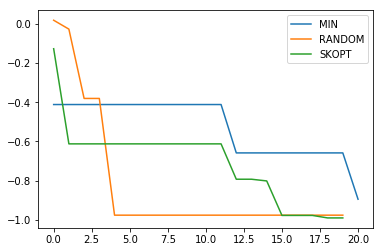

In [18]:
viz.plot_min_curves([sample_y[np.newaxis,:], np.array(y_random)[np.newaxis,:], res.func_vals[np.newaxis,:]],['MIN', 'RANDOM', 'SKOPT'])